<a href="https://colab.research.google.com/github/dami163/Assignment-2/blob/main/Question_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

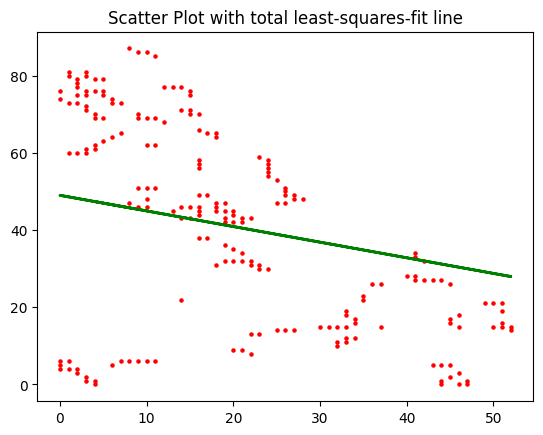

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, 550, 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

m,c = np.polyfit(x,y,1)
fitted_line = m*x + c

data_matrix = np.vstack([x, y]).T
center_point = np.mean(data_matrix, axis=0)
data_centeroid = data_matrix - center_point
U, S, Vt = np.linalg.svd(data_centeroid, full_matrices=False)
angle = -Vt[0, 0] / Vt[1, 0]
interception_point = center_point[1] - angle * center_point[0]
fitted_tls_line = angle * x + interception_point

plt.scatter(x, y, s=5, c='r')
plt.title('Scatter Plot with total least-squares-fit line')
plt.plot(x, fitted_tls_line, 'g', lw=2)
plt.show()
